In [ ]:
##%matplotlibinline
##################################################################
# Example:  Creating a line plot
# To begin with, we import the pyplot package from matplotlib
# Common practice is to alias pyplot as plt
# We also import numpy

import matplotlib.pyplot as plt
import numpy

###############################################
# Let's generate some sample data to plot
# We will plot two functions of x
pi = numpy.pi
npts = 64
mydt='float64'
x  = numpy.linspace(0,2*pi,npts,dtype=mydt)

y1 = x
y2 = x*x
y3 = numpy.cos(2*x)
###############################################

# We will display the figure on the screen by default.
# Set this to "True" in order to save the figure to the disk.
savefig=True

# Set the dimensions   
width_inches  = 8
height_inches = 4
sizetuple=(width_inches,height_inches)

# Initialize a figure and an axes object.
# The Figure instance is a container for multiple
# plots (axes objects).  We mainly work with axes
# objects.

fig, ax = plt.subplots(figsize=sizetuple)


ax.plot(x,y1)        # Plot our first curve

# Matplotlib choose default colors based on the ordering of the plots.
# The first plot is blue, the second is orange, etc.
# We can control the color using a single-character string corresponding
# to the first letter of the color we want to use.

# We can also add additional characters that indicate the linestyle we would like to adopt.
# For other available symboles and linestyles, see 
#  https://matplotlib.org/api/markers_api.html

ax.plot(x,y2,'go')   # green circles (first letter g = green; second letter o = filled circle)
ax.plot(x,y3,'r--')  # red dashed lines (first letter r = red; second characters indicate line pattern)

# The set_{xlabel, ylabel, title} functions control the axis labels and plot title
ax.set_xlabel('x-axis label')
ax.set_ylabel('y-axis label')
ax.set_title('Plot Title')

# Calling the tight_layout() function ensures that margins
# for the current figure are set so that axis labels, titles, etc.
# all fit nicely on the page.
#plt.tight_layout() 

# Finally, we display our figure to the screen or save it to disk.
if (savefig):
    # Python can save figures in a variety of formats.
    ext='png'
    #ext='jpeg'
    #ext='pdf'
    filename = 'simple_plot.'+ext
    plt.savefig(filename)
else:
    #To view the plot on our screen, we use the "show" function.
    plt.show()





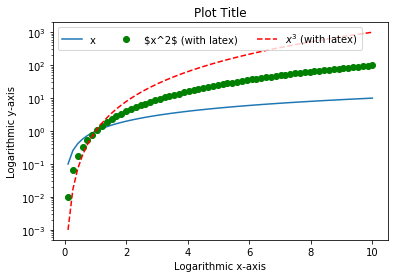

In [13]:
##################################################################
# Example:  Creating a plot with:
#  -- logarithmic axes
#  -- a legend
#  -- embedded latex formulae
# To begin with, we import the pyplot package from matplotlib
# Common practice is to alias pyplot as plt
# We also import numpy

import matplotlib.pyplot as plt
import numpy as np

###############################################
# Let's generate some sample data to plot
# We will plot two functions of x
pi = np.pi
npts = 64
mydt='float64'
x  = np.linspace(0.1,10,npts,dtype=mydt)

y1 = x
y2 = x*x
y3 = x*x*x
###############################################

# To create a legend, we use the label 
# keyword when creating each of our plots
# If we wish, we can use latex by setting label=r'$latex formula$' .
# Note that the 'r' goes outside the quotes.


fig, ax = plt.subplots()
ax.plot(x,y1,label = 'x')
ax.plot(x,y2,'go',label = '\$x^2$'+' (with latex)') # green circles (first letter g = green; second letter o = filled circle)
ax.plot(x,y3,'r--',label=r'$x^3$'+' (with latex)')  # red dashed lines (first letter r = red; second characters indicate line pattern)

ax.set_xlabel('Logarithmic x-axis')
ax.set_ylabel('Logarithmic y-axis')
ax.set_title('Plot Title')

# To use logarithmic axes, call the set_xscale and set_yscale methods and pass the value "log."
ax.set_yscale('log')
#ax.set_xscale('log')

# Once our plot is set, call the legend function 
# loc controls the placement relative to the ax bounds.
# ncol controls the number of columns used in the legend.
legend = plt.legend(loc='upper left', shadow=False, ncol = 3) 

plt.show()





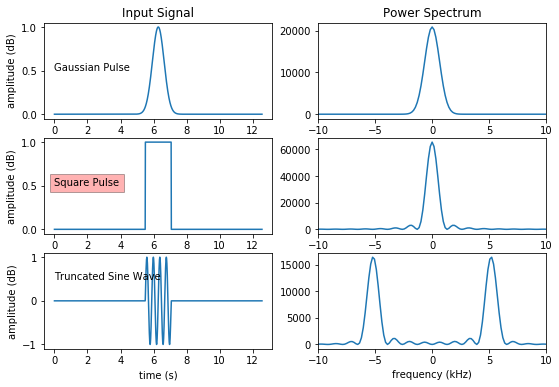

In [20]:
##################################################################
# Example:  Creating a figure with:
#  -- multiple plots
#  -- text annotation
#  -- data created using an FFT

import matplotlib.pyplot as plt
import numpy as np

def compute_power(the_signal):
    """ Returns the power spectrum of the_signal 
                --Parameters--
        the_signal:  a 1-D numpy ndarray whose power spectrum is to be computed

              -- Return Values --
        the_power:  the power_spectrum of the_signal, with zero frequency stored
                    at the_power[npts//2], where npts is the size of the_signal array   
    """
    #  We use the fft function from numpy's fft package (np.fft.fft)
    the_fft = np.fft.fft(the_signal)
    # The fft returns is a complex array.   We can access the real and imaginary 
    # components of each array element using numpy's "real" and "imag" functions.
    the_power = np.real(the_fft)**2 + np.imag(the_fft)**2   

    # The FFT contains power at both negative and positive frequencies.
    # By convention, the zero-frequency-power is stored at index[0].
    # 
    # We shift the array to the right by npts//2 elements using numpy's "roll" function
    the_power = np.roll(the_power, npts//2)
    return the_power

###################################################
#  First, generate some data.
#  We construct three sample signals (in time) and 
#  their associated power spectrum (in frequency space)
pi = np.pi
npts = 2048
mydt='float64'
alpha = 0.50
time  = np.linspace(0,4*pi,npts,dtype=mydt)  # 512 points over the interval [0,2*pi]
dt = (np.max(time)-np.min(time))/npts
df = 1.0/dt
fshift = npts*df*0.5

frequency = np.linspace(0,npts*df,npts,dtype=mydt)
frequency = frequency-frequency[npts//2] # shift the zero point

# Let's create a few sample signals and examine their power spectrum
sig1 = np.exp(-((time-time[npts//2])/alpha)**2) # Gaussian pulse

sig2 = np.zeros(npts)  # square pulse
sig2[7*npts//16:9*npts//16] = 1.0

sig3 = sig2*np.sin(16*time)  # sine wave with square-pulse envelope

sig1_pow = compute_power(sig1)
sig2_pow = compute_power(sig2)
sig3_pow = compute_power(sig3)


###########################################3
#  Next, set up the plot
savefig=False

sizetuple = (9,6)  # 9" wide x 6" tall

# Set up the image.  In addition to the image size,
# We also indicate that we will have multiple plots,
# distributed across 2 columns and 3 rows.
 
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize=sizetuple)


# ax is now a 2-D list of axes objects.  The first index
# indicates the row.  The second index indicates the column.

#################################
# ROW 1
#
# column 1
ax[0,0].plot(time,sig1)
ax[0,0].set_xlabel('time (s)')
ax[0,0].set_ylabel('amplitude (dB)')
ax[0,0].set_title('Input Signal')

# We can annotate our plot using "text"
# To do so, we specify (x-data coordinate, y-data coordinate, and string value) 
ax[0,0].text(0,0.5,'Gaussian Pulse')  # We can annotate our plot using text(x-data coord, y-data coordinate, 

#column 2
ax[0,1].plot(frequency/1000.0,sig1_pow)
ax[0,1].set_xlabel('frequency (kHz)')
ax[0,1].set_xlim([-10,10])
ax[0,1].set_title('Power Spectrum')

#####################################
# ROW 2
#
# column 1
ax[1,0].plot(time,sig2)
ax[1,0].set_xlabel('time (s)')
ax[1,0].set_ylabel('amplitude (dB)')

# We can add a bounding box around our annotation if we would like
# using the bbox keyword
# alpha = 0 is transparent; alpha = 1 is opaque

ax[1,0].text(0,0.5,'Square Pulse', bbox=dict(facecolor='r', alpha=0.3))  



# column 2
ax[1,1].plot(frequency/1000.0,sig2_pow)
ax[1,1].set_xlabel('frequency (kHz)')
ax[1,1].set_xlim([-10,10])

###############################3
# ROW 3
#
# column 1
ax[2,0].plot(time,sig3)
ax[2,0].set_xlabel('time (s)')
ax[2,0].set_ylabel('amplitude (dB)')
ax[2,0].text(0,0.5,'Truncated Sine Wave')

# column 2
ax[2,1].plot(frequency/1000.0,sig3_pow)
ax[2,1].set_xlabel('frequency (kHz)')
ax[2,1].set_xlim([-10,10])

#plt.tight_layout()

if (savefig):
    filename = 'subplots.png'
    plt.savefig(filename)
else:
    plt.show()


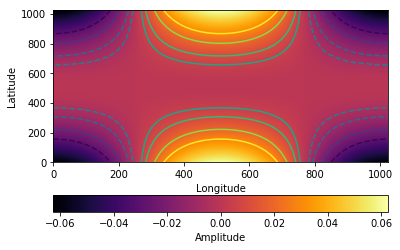

In [23]:
########################################################
# Example:
#       Creating a plot with 2-D data
#       Displayed in color
#       Displayed with contours

import numpy as np
import matplotlib.pyplot as plt

#Let's create some 2-d data. 
nx = 1024
ny = 1024
mydt = 'float64'
pi = np.pi
mydata = np.zeros((nx,ny),dtype=mydt)
for i in range(nx):
    xamp = ((0.5/nx) * (nx//2-i)) **2
    for j in range(ny):
        yamp = np.cos( 2*pi*(j-ny/2)/ny)
        mydata[i,j] = xamp*yamp


################################################3
#Plot
fig, ax = plt.subplots()
# We use the pcolormesh function
img = ax.pcolormesh(mydata,cmap='inferno')



###############################
# Add some contours
# Define the levels 
clevels = [-0.03, -0.02, -0.01, -0.005,  0.005, 0.01, 0.02, 0.03]
# We can also define line styles.  Make the negative levels dashed:
cstyles = ['--', '--', '--', '--', '-', '-', '-', '-' ]
cs = ax.contour(mydata, levels = clevels, linestyles=cstyles)
#If desired, we can add a colorbar
#colorbar is a method of the figure object, not the axes object
cbar = fig.colorbar(img, label='Amplitude', orientation='horizontal')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [34]:
###########################################################
#
#       Plotting Example
#           - displays a histogram and a polar plot
#           - provides example of Cartesian plot alongside polar plot

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


###################################################
# Give the random module a random seed (optional)
np.random.seed(19680801)

npts = 512

#Random points in theta
tmean = np.pi   # mean of distribution
tsigma = np.pi# standard  deviation of the distribution
theta = tmean+tsigma*np.random.randn(npts)   # Uniformly distributed set of points

#Random points in r
rmean = 0.0     
rsigma = 1      
r = rmean + rsigma * np.random.randn(npts)

##################################################
# Ensure that r and theta have sensible values
maxr = np.max(np.abs(r))
for i in range(npts):
    theta[i] = (theta[i] % (2*np.pi))  #*180.0/np.pi

    r[i] = np.abs(r[i])/maxr
    r[i] = r[i] % 1
    



##########################################
# Begin the figure
# Since we wish to draw a Cartesian plot
# alongside a polar plot, the sequence
# of commands we type is somewhat different
# in that figure and axes objects are initialized
# individually

# Begin by initializing the figure object
fig = plt.figure(1)

##############################
# Subplot 1 :  histogram of theta values
# Initialize our first axes object.
ax1=plt.subplot(1,2,1)  # 1 row, 2 columns, image 1  (1,2,1)

# the histogram of the data
num_bins = 10
ax1.hist(theta, num_bins,density=1)
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel('Probability density')
ax1.set_title(r'Histogram of $\theta$-values')

################################################
# Subplot 2 : Polar Plot of our Random Points
# Initialize our second axes object and set its projection to polar

ax2=plt.subplot(1,2,2,projection='polar')  # 1 row, 2 columns, image 2 (1,2,2)

for i in range(npts):
    ax2.plot(theta[i], r[i], 'r.')   # plot each point individually (no connecting line)

#ax2.plot(theta,r)
ax2.set_title('Random Points',pad=20)
ax2.set_rticks([0.5, 0.75, 1])  # Control radial ticks -- most easily accessible via "axes" object
ax2.set_rlabel_position(-22.5)  # Move radial labels away from plotted line

plt.tight_layout()
plt.savefig('test.pdf')


/home/feathern/class/miniconda3/envs/idp/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [33]:
help(ax2)

Help on PolarAxesSubplot in module matplotlib.axes._subplots object:

class PolarAxesSubplot(SubplotBase, matplotlib.projections.polar.PolarAxes)
 |  Base class for subplots, which are :class:`Axes` instances with
 |  additional methods to facilitate generating and manipulating a set
 |  of :class:`Axes` within a figure.
 |  
 |  Method resolution order:
 |      PolarAxesSubplot
 |      SubplotBase
 |      matplotlib.projections.polar.PolarAxes
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      *fig* is a :class:`matplotlib.figure.Figure` instance.
 |      
 |      *args* is the tuple (*numRows*, *numCols*, *plotNum*), where
 |      the array of subplots in the figure has dimensions *numRows*,
 |      *numCols*, and where *plotNum* is the number of the subplot
 |      being created.  *plotNum* starts at 1 in 